# Setting Up

In [1]:
# Install necessary libraries
!pip install transformer_lens
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.9/175.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [11]:
import torch
import torch.nn as nn
import numpy as np
import os

from transformer_lens import HookedTransformer, HookedTransformerConfig
from transformers import GPT2Tokenizer, GPT2Config
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

sns.set(style="whitegrid")
%matplotlib inline

Using device: cpu


In [3]:
# Load the tokenizer
model_name = 'gpt2-medium'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Add special tokens
special_tokens_dict = {
    'additional_special_tokens': ['<|startoftext|>', '<|endoftext|>', '<|sep|>', '<|pad|>']
}
tokenizer.add_special_tokens(special_tokens_dict)
tokenizer.pad_token = '<|pad|>'

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Paths to your models in Google Drive
finetuned_model_path = '/saved_models/LR_5e-5_BS_4_E_3'
classifier_model_path = 'best_model_state.bin'

In [6]:
!cp "{finetuned_model_zip_path}" .
!cp "{classifier_model_path}" .
## Now, both finetuned_gpt2_medium.zip and best_model_state_3.3_final.bin are in Colab working directory.

In [ ]:
# # Extract the Finetuned GPT-2 Medium Model
# import zipfile

# with zipfile.ZipFile('finetuned_gpt2_medium.zip', 'r') as zip_ref:
#     zip_ref.extractall('finetuned_gpt2_medium')

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load the tokenizer
# finetuned_model_path = 'finetuned_gpt2_medium'
tokenizer = GPT2Tokenizer.from_pretrained(finetuned_model_path)

# Add special tokens if necessary
special_tokens_dict = {
    'additional_special_tokens': ['<|startoftext|>', '<|endoftext|>', '<|sep|>', '<|pad|>']
}
tokenizer.add_special_tokens(special_tokens_dict)
tokenizer.pad_token = '<|pad|>'

# Load the finetuned model
finetuned_model = GPT2LMHeadModel.from_pretrained(finetuned_model_path)
finetuned_model.resize_token_embeddings(len(tokenizer))
finetuned_model.to(device)
finetuned_model.eval()

Using device: cpu


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50260, 1024)
    (wpe): Embedding(1024, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1024, out_features=50260, bias=False)
)

In [9]:
# Load the Base GPT-2 Medium Model into HookedTransformer

from transformer_lens import HookedTransformer

# Load the base GPT-2 Medium model into HookedTransformer
model_name = 'gpt2-medium'
base_model = HookedTransformer.from_pretrained(model_name, device=device)
base_model.eval()

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loaded pretrained model gpt2-medium into HookedTransformer


HookedTransformer(
  (embed): Embed()
  (hook_embed): HookPoint()
  (pos_embed): PosEmbed()
  (hook_pos_embed): HookPoint()
  (blocks): ModuleList(
    (0-23): 24 x TransformerBlock(
      (ln1): LayerNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln2): LayerNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (attn): Attention(
        (hook_k): HookPoint()
        (hook_q): HookPoint()
        (hook_v): HookPoint()
        (hook_z): HookPoint()
        (hook_attn_scores): HookPoint()
        (hook_pattern): HookPoint()
        (hook_result): HookPoint()
      )
      (mlp): MLP(
        (hook_pre): HookPoint()
        (hook_post): HookPoint()
      )
      (hook_attn_in): HookPoint()
      (hook_q_input): HookPoint()
      (hook_k_input): HookPoint()
      (hook_v_input): HookPoint()
      (hook_mlp_in): HookPoint()
      (hook_attn_out): HookPoint()
      (hook_mlp_out): HookPoint()
      (h

In [ ]:
import torch.nn as nn

# Define the classification model
class ToxicCommentClassifier(nn.Module):
    def __init__(self, base_model, n_classes=1):
        super(ToxicCommentClassifier, self).__init__()
        self.base_model = base_model  # HookedTransformer model
        self.dropout = nn.Dropout(p=0.3)
        self.out = nn.Linear(base_model.cfg.d_model, n_classes)
        # Freeze GPT-2 parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

    def forward(self, input_ids, attention_mask=None):
        # Get outputs and cache from the base model
        logits, cache = self.base_model.run_with_cache(input_ids)
        # Access the cache to get the residual stream after the last transformer block
        last_layer = self.base_model.cfg.n_layers - 1
        last_hidden_state = cache['resid_post', last_layer]  # Shape: [batch_size, seq_length, d_model]
        # Pool the outputs (mean pooling)
        pooled_output = torch.mean(last_hidden_state, dim=1)  # Shape: [batch_size, d_model]
        # Apply dropout and classification layer
        output = self.dropout(pooled_output)
        logits = self.out(output)  # Shape: [batch_size, n_classes]
        return logits

# Create the classifier model
classifier_model = ToxicCommentClassifier(base_model=base_model)
classifier_model.to(device)

# Load the classifier's state_dict if available
# classifier_model_path = 'best_model_state_3.3_final.bin'  # Replace with your actual path

classifier_model.load_state_dict(torch.load(classifier_model_path, map_location=device))
classifier_model.eval()

# Extract the weight vector w from the classification head
w = classifier_model.out.weight.data.squeeze(0)  # Shape: [d_model]
print("Shape of w:", w.shape)  # Should be [d_model]

<ipython-input-10-bf5392b4f02f>:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  classifier_model.load_state_dict(torch.load(classifier_model_path, map_location=device))


Shape of w: torch.Size([1024])


# Extraction

## Key-Value Vectors

In [48]:
def extract_key_value_vectors_hooked(model):
    k_vectors = []
    v_vectors = []
    indices = []

    num_layers = model.cfg.n_layers

    for layer_idx in range(num_layers):
        mlp = model.blocks[layer_idx].mlp

        W_in = mlp.W_in.detach().cpu()
        W_out = mlp.W_out.detach().cpu()

        # Bringing Back to Standard Notation
        W_in = W_in.T  # Shape: [d_mlp, d_model]
        W_out = W_out.T  # Shape: [d_model, d_mlp]

        # W_in has shape [d_mlp, d_model] = [4096, 1024]
        # W_out has shape [d_model, d_mlp] = [1024, 4096]

        for row_idx in range(W_in.shape[0]):
          k = W_in[row_idx, :]
          v = W_out[:, row_idx]
          k_vectors.append(k)
          v_vectors.append(v)
          indices.append((layer_idx, row_idx))

    k_vectors_tensor = torch.stack(k_vectors)  # Shape: [total_columns, d_mlp]
    v_vectors_tensor = torch.stack(v_vectors)  # Shape: [total_columns, d_model]
    return k_vectors_tensor, v_vectors_tensor, indices

In [49]:
def extract_key_value_vectors_transformers(model):
    k_vectors = []
    v_vectors = []
    indices = []

    num_layers = model.config.n_layer

    for layer_idx in range(num_layers):
        mlp = model.transformer.h[layer_idx].mlp

        W_in = mlp.c_fc.weight.detach().cpu()
        W_out = mlp.c_proj.weight.detach().cpu()

        # Bringing Back to Standard Notation
        W_in = W_in.T
        W_out = W_out.T

        # W_in has shape [d_mlp, d_model] = [4096, 1024]
        # W_out has shape [d_model, d_mlp] = [1024, 4096]

        for row_idx in range(W_in.shape[0]):
          k = W_in[row_idx, :]
          v = W_out[:, row_idx]
          k_vectors.append(k)
          v_vectors.append(v)
          indices.append((layer_idx, row_idx))

    k_vectors_tensor = torch.stack(k_vectors)  # Shape: [total_columns, d_mlp]
    v_vectors_tensor = torch.stack(v_vectors)  # Shape: [total_columns, d_model]
    return k_vectors_tensor, v_vectors_tensor, indices

In [51]:
# Base model
k_vectors_base, v_vectors_base, indices_base = extract_key_value_vectors_hooked(base_model)
print("Extracted key - value vectors from the base model.")

# Finetuned model
k_vectors_finetuned, v_vectors_finetuned, indices_finetuned = extract_key_value_vectors_transformers(finetuned_model)
print("Extracted key - value vectors from the finetuned model.")

Extracted key - value vectors from the base model.
Extracted key - value vectors from the finetuned model.


In [52]:
print("Shape of k_vectors_base:", k_vectors_base.shape)
print("Shape of v_vectors_base:", v_vectors_base.shape)
print("Shape of k_vectors_finetuned:", k_vectors_finetuned.shape)
print("Shape of v_vectors_finetuned:", v_vectors_finetuned.shape)
print("Shape of w:", w.shape)

Shape of k_vectors_base: torch.Size([98304, 1024])
Shape of v_vectors_base: torch.Size([98304, 1024])
Shape of k_vectors_finetuned: torch.Size([98304, 1024])
Shape of v_vectors_finetuned: torch.Size([98304, 1024])
Shape of w: torch.Size([1024])


In [53]:
def compute_cosine_similarities(vector_tensor, w):
    """
    Computes the cosine similarity between each vector in 'vectors' and the vector 'w'.

    Args:
        vectors (torch.Tensor): Tensor of shape [N, d].
        w (torch.Tensor): Tensor of shape [d].

    Returns:
        np.ndarray: Array of cosine similarity scores of shape [N].
    """
    # Normalize w and v vectors
    w_norm = w / w.norm()  # Shape: [d_model]
    vector_norm = vector_tensor / vector_tensor.norm(dim=1, keepdim=True)  # Shape: [total_columns, d_model]

    # Compute cosine similarities
    cosine_similarities = torch.matmul(vector_norm, w_norm.to(vector_norm.device))  # Shape: [total_columns]

    # Move to CPU for processing
    cosine_similarities = cosine_similarities.cpu().numpy()
    return cosine_similarities

In [54]:
# # Base model
# cosine_sim_base = compute_cosine_similarities(v_vectors_base, w)
# print("Computed cosine similarities for the base model.")

# # Finetuned model
# cosine_sim_finetuned = compute_cosine_similarities(v_vectors_finetuned, w)
# print("Computed cosine similarities for the finetuned model.")

Computed cosine similarities for the base model.
Computed cosine similarities for the finetuned model.


## Finetuning Analysis

In [18]:
# k_vectors_base: torch.Tensor of shape [num_vectors, d_model]
# v_vectors_base: torch.Tensor of shape [num_vectors, d_model]
# k_vectors_finetuned: torch.Tensor of shape [num_vectors, d_model]
# v_vectors_finetuned: torch.Tensor of shape [num_vectors, d_model]
# indices_base: list of (layer, column) tuples for base model
# indices_finetuned: list of (layer, column) tuples for finetuned model

# Convert indices to sets for efficient lookup
set_indices_base = set(indices_base)
set_indices_finetuned = set(indices_finetuned)


In [55]:
## Cosine Similarity
k_vectors_base = k_vectors_base.to('cpu').double()
v_vectors_base = v_vectors_base.to('cpu').double()
k_vectors_finetuned = k_vectors_finetuned.to('cpu').double()
v_vectors_finetuned = v_vectors_finetuned.to('cpu').double()

# Normalize the vectors
k_base_norm = k_vectors_base / k_vectors_base.norm(dim=1, keepdim=True)
v_base_norm = v_vectors_base / v_vectors_base.norm(dim=1, keepdim=True)
k_finetuned_norm = k_vectors_finetuned / k_vectors_finetuned.norm(dim=1, keepdim=True)
v_finetuned_norm = v_vectors_finetuned / v_vectors_finetuned.norm(dim=1, keepdim=True)

# Compute cosine similarities
k_cosine_similarities = torch.sum(k_base_norm * k_finetuned_norm, dim=1).numpy()
v_cosine_similarities = torch.sum(v_base_norm * v_finetuned_norm, dim=1).numpy()

# Check the shape
print(f"Cosine Similarities Shape: {k_cosine_similarities.shape}, {v_cosine_similarities.shape}")

Cosine Similarities Shape: (98304,), (98304,)


In [56]:
## Norm Differences
# Compute norms
k_norm_base = k_vectors_base.norm(dim=1)
v_norm_base = v_vectors_base.norm(dim=1)
k_norm_finetuned = k_vectors_finetuned.norm(dim=1)
v_norm_finetuned = v_vectors_finetuned.norm(dim=1)

# Compute absolute differences
k_norm_differences = torch.abs(k_norm_base - k_norm_finetuned).numpy()
v_norm_differences = torch.abs(v_norm_base - v_norm_finetuned).numpy()

# Check the shape
print(f"Norm Differences Shape: {k_norm_differences.shape}, {v_norm_differences.shape}")

Norm Differences Shape: (98304,), (98304,)


In [57]:
# Create a DataFrame
df_all_vectors = pd.DataFrame({
    'layer': [f"{layer}" for layer, column in indices_base],
    'column': [f"{column}" for layer, column in indices_base],
    'k_cosine_similarity': k_cosine_similarities,
    'v_cosine_similarity': v_cosine_similarities,
    'k_norm_difference': k_norm_differences,
    'v_norm_difference': v_norm_differences
})

# Display the first few rows
print(df_all_vectors.head())

  layer column  k_cosine_similarity  v_cosine_similarity  k_norm_difference  \
0     0      0             0.996796             0.999959           2.473081   
1     0      1             0.996494             0.999983           2.578062   
2     0      2             0.993430             0.999982           2.847275   
3     0      3             0.993191             0.999993           2.711121   
4     0      4             0.996063             0.999978           2.556026   

   v_norm_difference  
0           0.001543  
1           0.000705  
2           0.000263  
3           0.000229  
4           0.000522  


In [63]:
# Summary statistics for cosine similarities
k_cosine_stats = df_all_vectors['k_cosine_similarity'].describe()
print("Key Cosine Similarity Statistics:\n", k_cosine_stats)

v_cosine_stats = df_all_vectors['v_cosine_similarity'].describe()
print("\nValue Cosine Similarity Statistics:\n", v_cosine_stats)

# Summary statistics for norm differences
k_norm_diff_stats = df_all_vectors['k_norm_difference'].describe()
print("\nKey Norm Difference Statistics:\n", k_norm_diff_stats)

v_norm_diff_stats = df_all_vectors['v_norm_difference'].describe()
print("\nValue Norm Difference Statistics:\n", v_norm_diff_stats)

Key Cosine Similarity Statistics:
 count    98304.000000
mean         0.994185
std          0.011029
min          0.485288
25%          0.993994
50%          0.995336
75%          0.996445
max          0.998749
Name: k_cosine_similarity, dtype: float64

Value Cosine Similarity Statistics:
 count    98304.000000
mean         0.999948
std          0.000068
min          0.996186
25%          0.999941
50%          0.999966
75%          0.999980
max          0.999999
Name: v_cosine_similarity, dtype: float64

Key Norm Difference Statistics:
 count    98304.000000
mean         1.885936
std          0.347777
min          0.143178
25%          1.694034
50%          1.892074
75%          2.081255
max         17.539584
Name: k_norm_difference, dtype: float64

Value Norm Difference Statistics:
 count    9.830400e+04
mean     6.024520e-04
std      6.695425e-04
min      2.376534e-08
25%      2.037544e-04
50%      4.391342e-04
75%      7.895046e-04
max      2.182332e-02
Name: v_norm_difference, dtyp

<Axes: ylabel='k_cosine_similarity'>

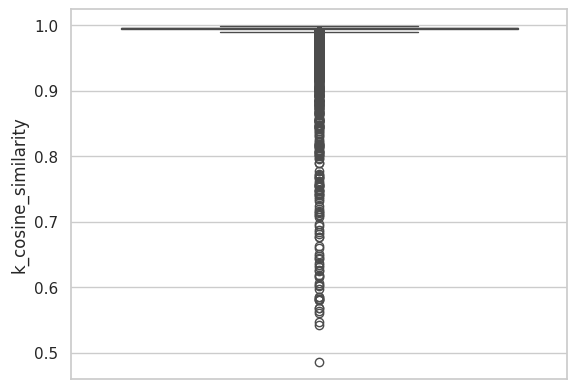

In [62]:
sns.boxplot(data=df_all_vectors['k_cosine_similarity'])

<h3> Observations </h3>
Significant Differences in Key Vectors post Finetuning
Marginal Change in Value Vectors post Finetuning (like DPO case)